# Part 2


## III. Models and Calibration 

## III.1. Introduction
Spatial interaction refers to the phenomenon where entities located at different points within physical space engage in various forms of engagement (Roy and Thill, 2004) while Spatial interaction modelling entails the examination of movements from a point of departure (origin) to a point of arrival (destination), either across tangible space, such as migration, or within conceptual space (Oshan, 2016). These entities cover both individuals and firms, and the choices they make may encompass a wide range of options such as housing, employment, production levels, and migration. The authors highlighted that the initial models used to understand spatial interaction can be classified within the broader category of gravity models, which emphasize modeling the behaviour of demand or supply segments rather than that of individual actors or organizations. Using an entropy-maximizing framework, Wilson derives a more informative and flexible “family” of four spatial interaction models (Wilson, 1971). This framework seeks to assign flows between a set of origins and destinations by finding the most probable configuration of flows out of all possible configurations, without making any additional assumptions. These spatial interaction models include unconstrained, production-constrained, attraction-constrained, and doubly-constrained. 

### 1. The Unconstrained Model
Multiplicate gravity Model:

\begin{equation} \tag{1}
T_{ij} = k \frac{O_i^\alpha  D_j^\gamma}{ d_{ij}^\beta}
\end{equation}

According to Wilson (1971), the Gravity Model can also be expressed in a more recognizable or familiar form:

\begin{equation} \tag{2}
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

This model suggests that the interactions  or flows between the origin and destination are directly proportional to the product of the origin's and destination's masses, and inversely proportional to the distance between them. In a simple term, the flow or interaction between the origin and destination depends on the size of both origin and destination (i.e., large origin or destination tend to have more interactions). However, the distance between them plays a role; the farther they are, the less likely they are to interact frequently.

<b> Where:
- $T_{ij}$ represents the transition or flow, $T$, from the origin labeled as $i$ (corresponding to rows in a matrix) to the destination labeled as $j$ (corresponding to columns in a matrix).
- $O$ is a vector (a 1-dimensional matrix, thus, a single line of numbers) of origin attributes which relate to the ability of an origin location to send out or emit flows to destination locations.
- $D$ is a vector of destination attributes describing the attractiveness of all destinations ($j$).
- $d$ is a matrix of costs relating to the flows between $i$ and $j$ which may include transportation costs, travel time, distance, etc.
- $k$, $\alpha$, $\gamma$ and $β$ are all the model parameters that would be estimated.
- $\alpha$ is a vector of parameters representing the effect of origin attributes on flows. In order words, controls the rate at which the interaction strength decreases with distance.
- $\gamma$  is a vector of parameters representing the effect of destination attributes on flows.
- $β$ is a parameter signifying the effect of transportation costs on flows between locations.
- $k$  is a scaling factor that ensures the total observed and predicted flows are consistent:

\begin{equation} \tag{3}
k = \frac{T}{\sum_i \sum_j O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}}
\end{equation}

and $T$ is the sum of the matrix of observed flows:

\begin{equation} \tag{4}
T= \sum_i \sum_j T_{ij}
\end{equation}

## 2. Production-constrained Model
\begin{equation} \tag{5}
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} \tag{6}
O_i = \sum_j T_{ij}
\end{equation}

and

\begin{equation} \tag{7}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}

In the production-constrained model, $O_i$ is fixed and does not change because it is a known constraint for each origin $i$. $A_i$ is called a "balancing factor," acting like $k$ in the unconstrained/total constrained model. In this case, $A_i$ makes sure that the predicted flows from each origin add up to the specific known total $O_i$ instead of only the overall total. In other words, it ensures the total out-flows are preserved in the predicted flows.


## 3. Attraction-Constrained Model
The attraction-constrained model is virtually the same as the production-constrained model:

\begin{equation} \tag{8}
T_ij = D_j B_j O_i^\alpha d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} \tag{9}
D_j = \sum_i T_{ij}
\end{equation}

and 

\begin{equation} \tag{10}
B_j = \frac{1}{\sum_i O_i^\alpha d_{ij}^{-\beta}}
\end{equation}

- $Dj$ is a vector indicating the total number of flows ending at destination $j$.

- $Bj$ is a vector of destination balancing factors that ensure the preservation of the total in-flows in the predicted flows.



## 4. Doubly Constrained Model

\begin{equation} \tag{11}
T_{ij} = A_i B_j O_i D_j d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} \tag{12}
O_i = \sum_j T_{ij}
\end{equation}

\begin{equation} \tag{13}
D_j = \sum_i T_{ij} 
\end{equation}

and

\begin{equation} \tag{14}
A_i = \frac{1}{\sum_j B_j D_j d_{ij}^{-\beta}}
\end{equation}

\begin{equation} \tag{15}
B_j = \frac{1}{\sum_i A_i O_i d_{ij}^{-\beta}}
\end{equation}

the calculation of $A_i$ relies on knowing $B_j$ and the calculation of $B_j$ relies on knowing $A_i$. $f(dij)$   is a function of cost or distance or travel time called the distance-decay function. This is often an exponential or power function (Oshan, 2016),

<b> Power
\begin{equation} \tag{16}
f(d_{ij}) = d^{\beta}_{ij}
\end{equation}

<b> Exponential
\begin{equation} \tag{16}
f(d_{ij}) = exp({\beta}d_{ij})
\end{equation}

  

###  III.2. Unconstrained Model

The rationale behind my choice of method is that I wish to capture the overall impact of population and jobs on the interaction between different locations, without necessarily implementing any form of specific limitations like policy restrictions and the unconstrained gravity model best fits this.  

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

### Flow Data

The dataset employed for evaluating and calibrating the Unconstrained spatial interaction models consists of London flow data, which includes columns for station_origin, station_destination, flows, population, jobs, and distance.

In [73]:
# Correct URL for the raw version of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/VincentBEDU/UrbanSim/main/Data/london_flows.csv'
# Read CSV file from the raw GitHub URL
londflow = pd.read_csv(url)

In [74]:
londflow.head(10)


,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560
6,Abbey Road,Custom House,0,599,845,3824.855630
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909
8,Abbey Road,Cyprus,7,599,850,6532.099618
9,Abbey Road,Devons Road,1,599,611,3958.324171


In [75]:
londflow.describe()

,flows,population,jobs,distance
count,61474.000000,61474.000000,61474.000000,61474.000000
mean,25.090136,5532.198311,6136.424797,16314.843326
std,131.416761,8509.601663,10916.883647,9401.466906
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1554.000000,792.000000,8939.809178
50%,3.000000,2839.000000,1921.000000,15232.813070
75%,13.000000,5389.000000,6295.000000,22283.826200
max,15946.000000,67372.000000,78549.000000,60633.323740


In [76]:
# Assuming londflow is your DataFrame and 'distance' is the column name
has_zero_distance = (londflow['distance'] == 0).any()

# Print the result
if has_zero_distance:
    print("There are rows with distance equal to 0.")
else:
    print("There are no rows with distance equal to 0.")


There are rows with distance equal to 0.


In [77]:
# Assuming londflow is your DataFrame and 'distance' is the column name
# Remove rows where the 'distance' column has a value of 0
londflow1 = londflow[londflow['distance'] != 0]

# Now, londflow contains only the rows where distance is not zero


In [78]:
# Assuming londflow is your DataFrame and 'distance' is the column name
has_zero_distance = (londflow1['distance'] == 0).any()

# Print the result
if has_zero_distance:
    print("There are rows with distance equal to 0.")
else:
    print("There are no rows with distance equal to 0.")


There are no rows with distance equal to 0.


In [79]:
import numpy as np
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
londflow2 = pd.pivot_table(londflow1, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
londflow2.fillna(0, inplace=True)
londflow2

/tmp/ipykernel_582361/2828805630.py:3: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow2 = pd.pivot_table(londflow1, values ="flows", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/2828805630.py:3: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow2 = pd.pivot_table(londflow1, values ="flows", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/2828805630.py:3: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To k

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,5.0,47.0,0.0,0.0,0.0,0.0,22.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530
Woodside Park,0.0,0.0,1.0,26.0,11.0,0.0,0.0,0.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093


### Estimating Model Parameters

It is possible now to generate flow estimates by inserting arbitrary or expected values into our parameters. These parameters indicate the scaling effect or significance of the associated variables. Considering a situation where the impact of origin and destination attributes on flows scales linearly. For instance, a 1 unit increase in population at the origin corresponds to a 1 unit increase in flows, $\alpha$ and $\gamma$ are set to 1. However, in Newton's original gravity equation, $\beta$ is set to 2, describing a power law relationship between distance and the flows. For example, a 1 unit increase in distance results in a $1^{-2}$ (1) unit decrease in flows, a 2 unit increase leads to a $2^{-2}$ (0.25 or 1/4) decrease, and a 3 unit increase results in a $3^{-2}$ (0.111) decrease, and so on.

### Distance and total flows plot

Text(0, 0.5, 'Total Flows')

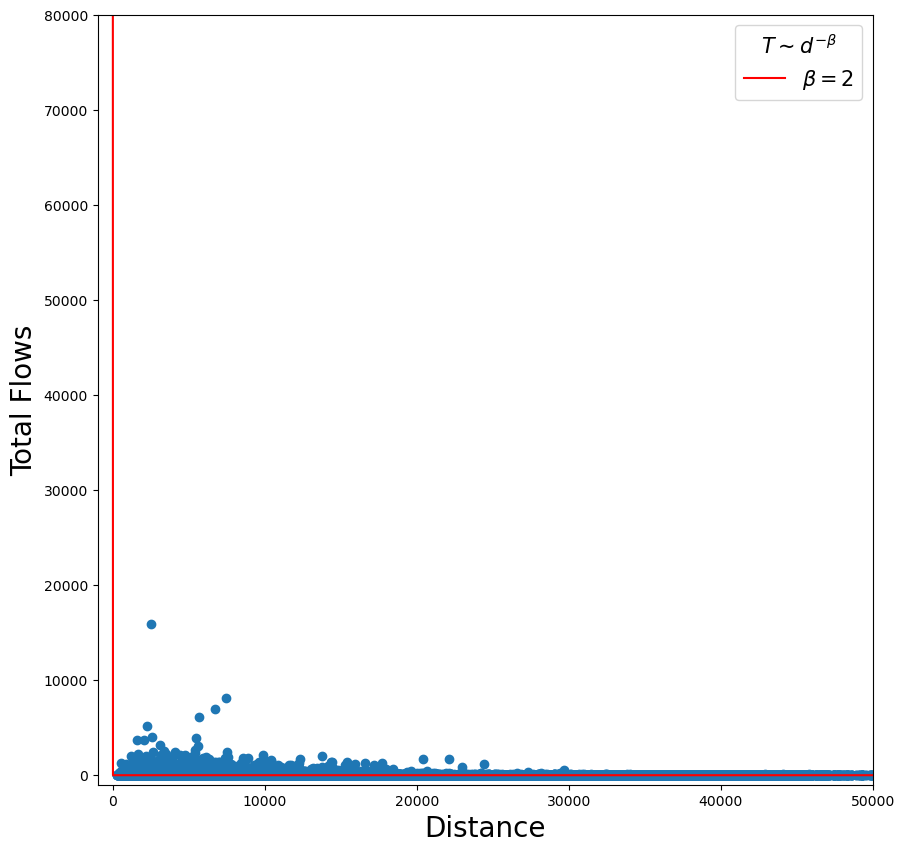

In [80]:
#first plot the Total commuter flows denoted by T against distance denoted by d
#and then fit a model line T ~ d^-beta with beta=2

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = londflow1["distance"], y=londflow1["flows"])
#line plot
line = np.arange(0.0002, 50_000, 0.1)
ax.plot(line, line**-2, color ="r", label = "$\\beta=2$")
#add a legend
ax.legend(title = "$T \\sim d^{-\\beta}$", fontsize = 15, title_fontsize=15)
#axis limits
ax.set_xlim([-1000,50000])
ax.set_ylim([-1000, 80000])
#set the labels
ax.set_xlabel("Distance", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

### Origin and flows data plot

Text(0, 0.5, 'Total Flows')

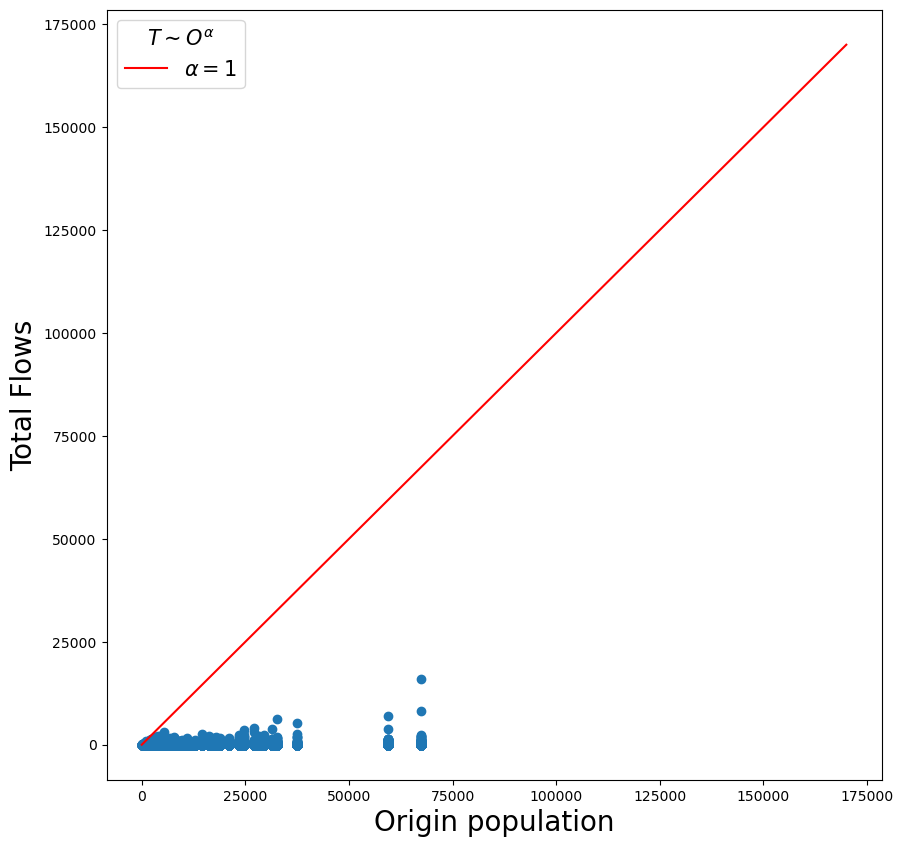

In [81]:
#Let us now look at the behaviour of the flows with respect to the population at the origin denoted by O
#and then fit a model line T ~ O^alpha, for alpha=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = londflow1["population"], y=londflow1["flows"])
#line plot
line = np.arange(0.0002, 170_000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\alpha=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim O^{\\alpha}$", title_fontsize=15)
#axis labels
ax.set_xlabel("Origin population", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

### Destination (jobs) and total flow plot

Text(0, 0.5, 'Total flows')

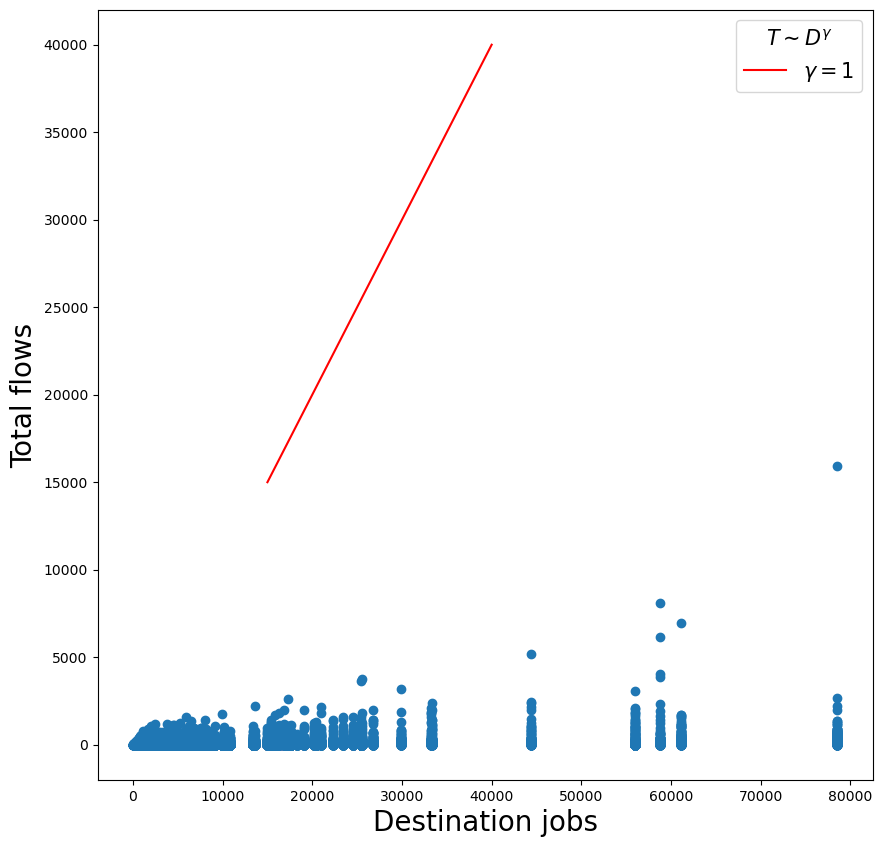

In [82]:
#Now let us look at the behaviour of the flows with respect to the jobs at destination denoted by jobs
# and then fit a model line  T ~ D^gamma. We will fit a line for gamma=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = londflow1["jobs"], y=londflow1["flows"])
#line plot
line = np.arange(15_000, 40000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\gamma=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim D^{\\gamma}$", title_fontsize=15)
#axis labels
ax.set_xlabel("Destination jobs", fontsize = 20)
ax.set_ylabel("Total flows", fontsize = 20)

Destination jobs and origin population do not look too promising as a predictor so let's see what flow estimates with these starting parameters look like.

In [83]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(londflow1["flows"])

In [84]:
print(T2) 

1542283


Now we can create some flow estimates using equation 2 above.

\begin{equation} \tag{2}
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}



In [85]:
#applying parameters to variables using equation 3 above.
Oi_alpha = londflow1["population"]**alpha
Dj_gamma = londflow1["jobs"]**gamma
dist_beta = londflow1["distance"]**-beta
T1 = Oi_alpha*Dj_gamma*dist_beta  
k = T2/sum(T1)


In [86]:
londflow1

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795550
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [87]:
print(k)

13.454256498346734


Then, in Equation 2 above, multiply everything together to get the flow estimates.

In [88]:
#run the model and store of the new flow estimates in a new column
# londflow1["unconstrainedEst1"] = round(k*Oi_alpha*Dj_gamma*dist_beta, 0)
londflow1["unconstrainedEst1"] = k*Oi_alpha*Dj_gamma*dist_beta
#convert to integers
# londflow1["unconstrainedEst1"] = londflow1["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
round(sum(londflow1["unconstrainedEst1"]), 0)

/tmp/ipykernel_582361/3763125924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londflow1["unconstrainedEst1"] = k*Oi_alpha*Dj_gamma*dist_beta


1542283.0

Turn this into a matrix to look at the predictors flows produced

In [89]:
londflow3= londflow1.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

londflow3.fillna(0, inplace=True)
londflow3

/tmp/ipykernel_582361/1959950852.py:1: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow3= londflow1.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/1959950852.py:1: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow3= londflow1.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/1959950852.py:1: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.418401,5.662431e+02
Acton Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005587,0.000000,0.000000,5.893473e+01
Acton Town,0.000000,0.000000,0.000000,1.365741,1.353130,0.000000,1.509654,0.009194,0.000000,1.642956,...,1.288876,0.152531,0.203663,1.973179,0.000000,0.035786,0.000000,0.055059,0.000000,6.226543e+02
Aldgate,0.000000,0.000000,0.297810,0.000000,149.270977,0.000000,0.000000,0.004858,0.000000,25.244532,...,0.671373,0.000000,0.521510,0.397326,0.000000,0.109876,0.000000,0.096115,0.000000,9.969767e+03
Aldgate East,0.000000,0.000000,0.318167,160.961032,0.000000,0.000000,0.064403,0.005283,0.000000,24.277586,...,0.719534,0.081493,0.551705,0.420047,0.000000,0.146136,0.000000,0.102732,0.000000,8.089401e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.000000,0.000000,0.145087,2.042892,2.519716,0.000000,0.000000,0.000000,0.000000,1.640206,...,0.363792,0.000000,0.282359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.469103e+02
Woodgrange Park,0.000000,0.007497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.878262e+00
Woodside Park,0.000000,0.000000,0.134407,1.075989,1.066544,0.000000,0.031915,0.000000,0.000000,1.638315,...,0.328308,0.000000,0.190981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.242391e+02


In [90]:
londflow2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,5.0,47.0,0.0,0.0,0.0,0.0,22.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530
Woodside Park,0.0,0.0,1.0,26.0,11.0,0.0,0.0,0.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093


## How good is my model?

looking at the two matrices above the flow estimates are quite bad. Whilst it's OK to eyeball small flow matrics like this, when you have much larger matrices we need another solution ...

### Testing the "Goodness-of-fit"
Goodness-of-fit checks how well the model estimates match up with the observed flows.

To compute this,

the two most common ways are to look at the **coefficient of determination ($r^2$)** or the **Square Root of Mean Squared Error (RMSE)**. There are other methods and they all do more or less the same thing, which is essentially to compare the modelled estimates with the real data. $r^2$ is popular as it is quite intuitive and can be compared across models. RMSE is less intuitive, but some individuals argue that it is better for comparing changes to the same model. 

### R-Squared
 
$r^2$ is the square of the correlation coefficient, $r$


In [91]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(londflow1["flows"], londflow1["unconstrainedEst1"])

0.03463745836085647

Using this function we get a value of around 0.0346, or around 3.46%. This tells us that our model accounts for about 3.46% of the variation of flows in the system. , which is very bad.

### Root Mean Squared Error (RMSE)

We can use a similar simple function to calcualte the RMSE for our data

In [92]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(londflow1["flows"], londflow1["unconstrainedEst1"])

485.364

The figure that is produced by the RMSE calcaultion is far intuitive than the $r^2$. However, it cannot be used to compare different models run using different data sets. But, it is good for assessing whether changes to the model result in improvements. The closer to 0 the RMSE value, the better the model.

## Improving our model: 1 -  calibrating parameters
This model outcome is poor and therefore needs improvement

A way to improve the fit of the model is by calibrating the parameters on the flow data.

The traditional way that this has been done computationally is by using the goodness-of-fit statistics. 

Taking logarithms of both sides of Equation 2:
\begin{equation} \tag{5}
\ln T_{ij} = K + \alpha \ln O_i + \gamma \ln D_j - \beta \ln d_{ij}
\end{equation}

where $K= \ln k$ transforming it into a linear regression model.

Now there are a couple of papers that are worth reading at this point. Perhaps the best is [Flowerdew and Aitkin (1982)](http://onlinelibrary.wiley.com/doi/10.1111/j.1467-9787.1982.tb00744.x/abstract), title “A METHOD OF FITTING THE GRAVITY MODEL BASED ON THE POISSON DISTRIBUTION”.

One of the key points that Flowerdew and Aitkin make is that the model in equation 5 (known as a log-normal model) has various problems associated with it which means that the estimates produced might not be reliable. If you'd like to know more about these, read that paper (and also Wilson's 1971 paper), but at this point it is worth knowing that the way around many of these is to re-specify the model, not as a log-normal regression, but as a Poisson or negative binomial regression model.

## Poisson regression

The main theory behind the Poisson regression model is that the sorts of flows that spatial interaction models deal with (such as migration or commuting flows) relate to non-negative integer counts (you can’t have negative people moving between places and you can’t - normally, if they are alive - have fractions of people moving either).

As such, the continuous (normal) probability distributions which underpin standard regression models don’t hold. However, the discrete probability distributions such as the **Poisson distribution and the negative binomial distribution** (of which the Poisson distribution is a special case - wikipedia it) do hold and so we can use these associations to model our flows.


Here’s a normal distribution:

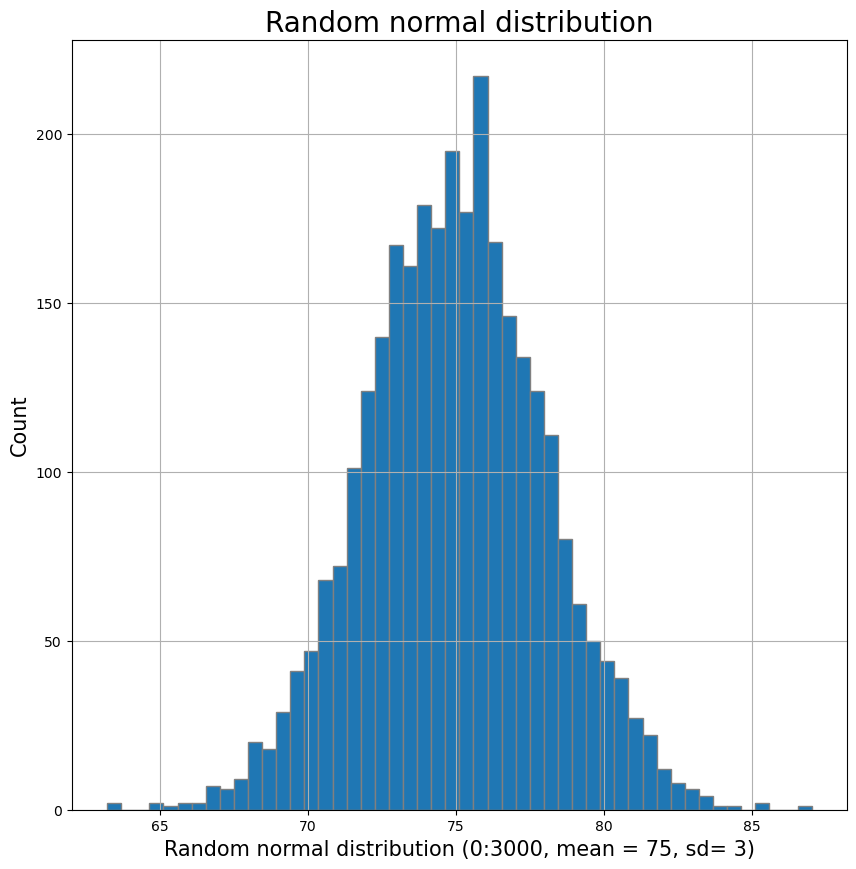

In [93]:
plt.subplots(figsize=(10,10))

plt.hist(np.random.normal(loc = 75, scale= 3, size = 3000 ), bins = 50, edgecolor = "grey")
plt.xlabel("Random normal distribution (0:3000, mean = 75, sd= 3)", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Random normal distribution", fontsize = 20)
plt.grid(True)

Poisson Distribution with the same mean

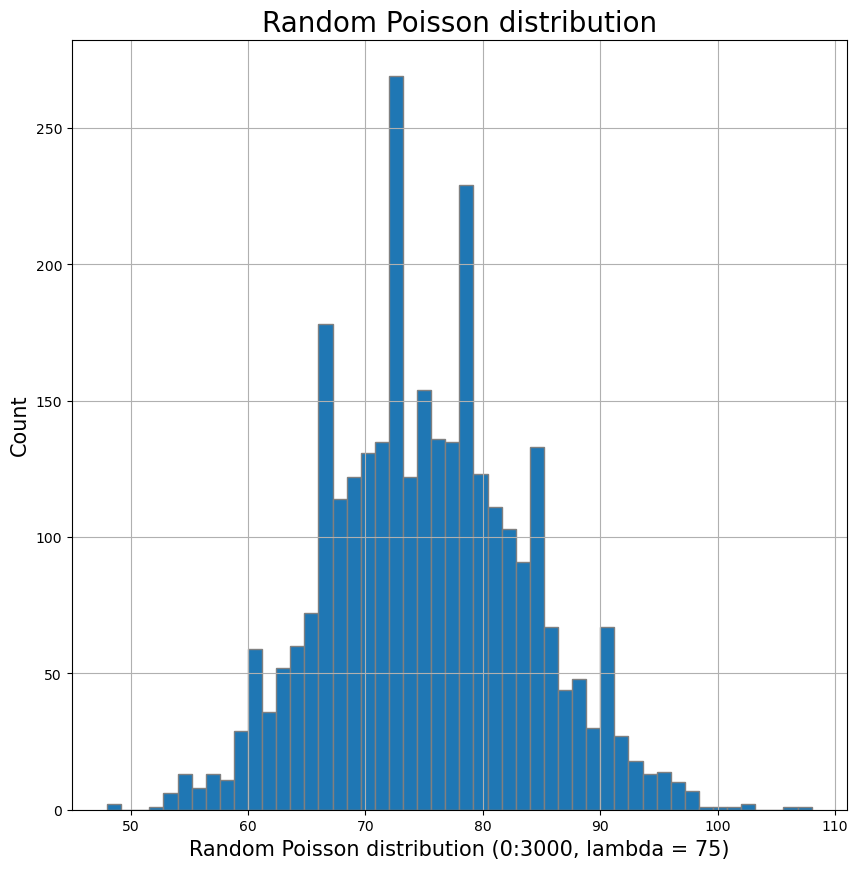

In [94]:
plt.subplots(figsize=(10,10))

plt.hist(np.random.poisson(lam = 75, size = 3000 ), bins = 50, edgecolor = "grey")
plt.xlabel("Random Poisson distribution (0:3000, lambda = 75)", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Random Poisson distribution", fontsize = 20)
plt.grid(True)


They look alike but the thing with the Poisson distribution is that when the mean (λ - lambda) changes, so does the distribution. As the mean gets smaller (and this is often the case with flow data where small flows are very likely - have a look at the ‘Total’ column in your data dataframe, lots of small numbers are not there?) the distribution starts to look a lot more like a skewed or log-normal distrbution. The key thing it's not - it’s a Poisson distribution. Here’s a similar frequency distribution with a small mean:


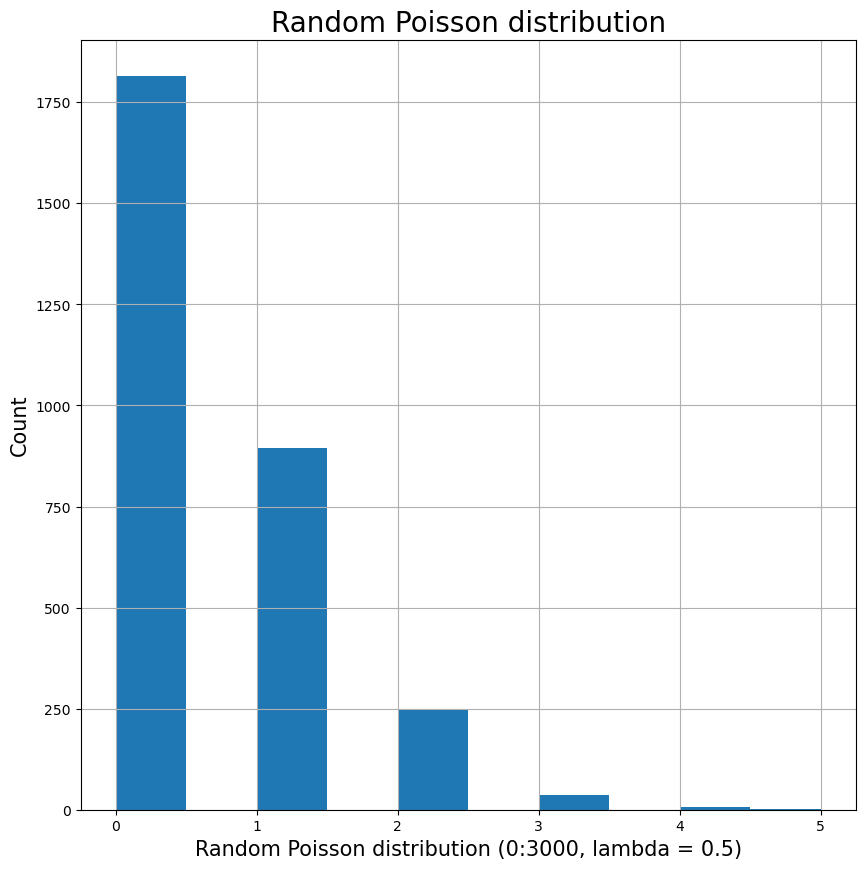

In [95]:
plt.subplots(figsize=(10,10))

plt.hist(np.random.poisson(lam = 0.5, size = 3000))
plt.xlabel("Random Poisson distribution (0:3000, lambda = 0.5)", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Random Poisson distribution", fontsize = 20)
plt.grid(True)

 What this means is that if we are interested in all flows between all origins and destinations in our system, these flows will have a mean value of $\lambda_{ij}$ and this will dictate the distribution. Here’s what the distrbution of our flows looks like:

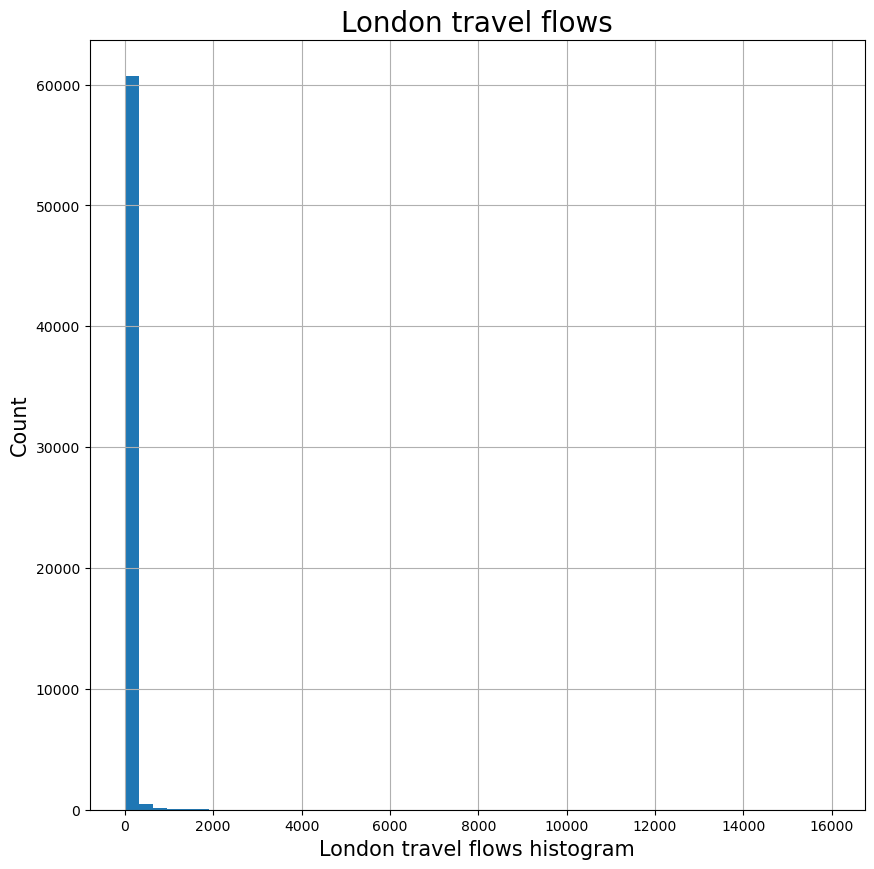

In [96]:
plt.subplots(figsize=(10,10))

plt.hist(londflow1["flows"], histtype="stepfilled" , bins = 50)
plt.xlabel("London travel flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel flows", fontsize = 20)
plt.grid(True)

### Mmmm, Poissony!

So, what does all of this mean for our spatial interaction model?

Well the main thing it means is that Equation 5, for most sorts of spatial interaction models where we are modelling flows of people or whole things, is not correct.

By logging both sides of the equation in Equation 5, we are trying to get a situation where our Tij flows can be modelled by using the values of our other variables such as distance, by using a straight line a bit like this:

Text(0, 0.5, 'log(flows)')

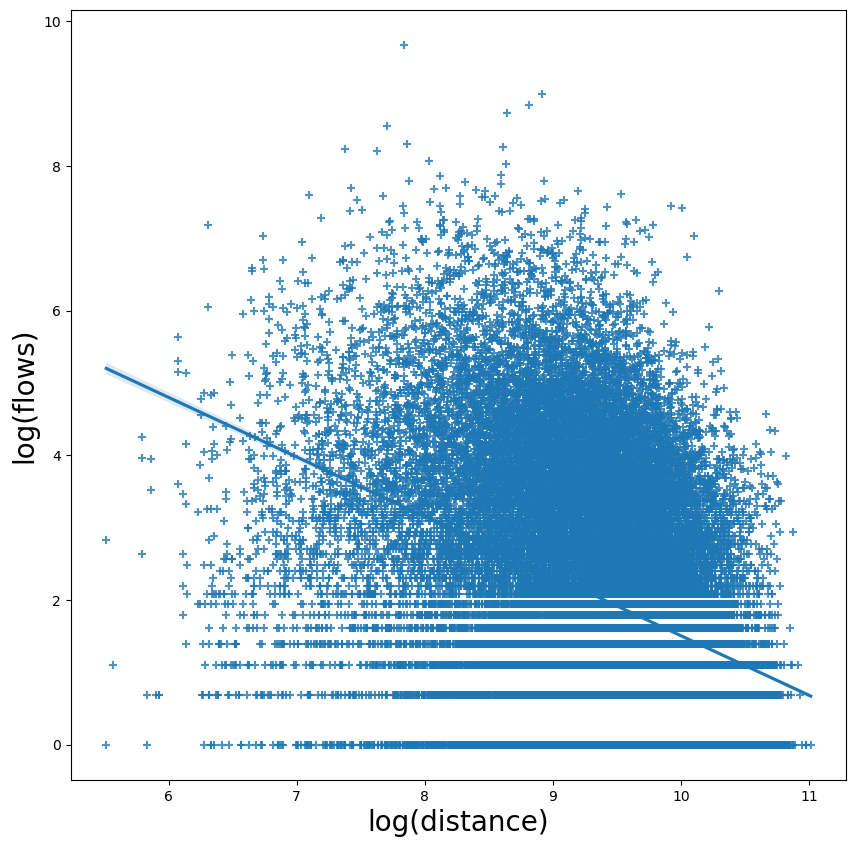

In [97]:
#subset the dataframe to the flows we want
data_flows = londflow[["flows", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
data_flows = data_flows[(data_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(data_flows["distance"])
y = np.log(data_flows["flows"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(distance)", fontsize = 20)
ax.set_ylabel("log(flows)", fontsize = 20)

Comparing this graph with the graph above (the first scatter plot we drew), it’s the same data, but, by logging both the flows and distance, we can get a bit closer to fitting a model estimate using a straight line.

The Poisson distribution means that the y variable in our model corresponds to the expected value, as we will show in the equation (6) below, and the equation can be linearised and modelled similarly to the blue line above.

### The Poisson Regression Spatial Interaction Model

So, we can now re-specify Equation 5 as a Poisson Regression model. Basically, we are assuming that the flows follow a Poisson distribution, such that the expected value $\lambda_{ij}$ verifies:

\begin{equation} \tag{6}
\lambda_{ij} = \exp (K + \alpha \ln O_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

What this model says is that $\lambda_{ij}$ (our independent variable - the estimate of $T_{ij}$) is <i>logarithmically linked </i> to (or modelled by) a linear combination of the logged independent variables in the model. 

Now we have Equation 6 at our disposal, we can use a Poisson regression model to produce estimated of $k$, $\alpha$, $\gamma$ and $\beta$ - or put another way, we can use the rgeression model to calibrate our parameters.

So, let's have a go at doing it!

It is very straightforward to run a Poisson regression model in Python using the `glm` function in the Statsmodel.api library. In practical terms, running a GLM model is no different to running a standard regression model using `lm`. If you want to find more details about this you can visit the statsmodel api documentation [here](https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM) and [here](https://www.statsmodels.org/stable/examples/notebooks/generated/glm_formula.html) or for more information about the Poisson regression application you can read other articles on the internet such as this [medium article](https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958). If you delve far enough into the depths of what GLM does, you will find that the parameters are calibrated through an ‘iteratively re-weighted least squares’ algorithm. This algorithm does exactly the sort of job I described earlier, it fits lots of lines to the data, continually adjusting the parameters and then seeing if it can minimise the error between the observed and expected values using some goodness-of-fit measure.

These sorts of algorithms have been around for years and are very well established so it makes sense to make use of them rather than trying to re-invent the wheel ourselves.

In [98]:
londflow1.head(5)

,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.573774
1,Abbey Road,Beckton,1,599,442,8510.121774,0.049186
2,Abbey Road,Blackwall,3,599,665,3775.448872,0.375985
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,18.306970
4,Abbey Road,Canning Town,37,599,15428,2228.923167,25.026837


In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Assume londflow1 is your DataFrame with the necessary columns

# Take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    londflow1[f"log_{x}"] = np.log(londflow1[x])
    log_x_vars.append(f"log_{x}")

# Filter rows where 'flows' is not zero
filtered_londflow1 = londflow1[londflow1['flows'] != 0]


# Create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

# Run the regression
uncosim = smf.glm(formula=formula, 
                  data=filtered_londflow1, 
                  family=sm.families.Poisson()).fit()


/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_582361/3738741696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londflow1[f"log_{x}"] = np.log(londflow1[x])
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_582361/3738741696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Identify how the `glm` code corresponds to Equation 6.

`Total` = $T_{ij}$ = $\lambda_{ij}$

`~` means ‘is modelled by’

`log_population` = $\ln O_i$

`log_jobs` = $\ln D_j$

`log_distance` = $\ln d_{ij}$

`family=sm.families.Poisson()`means that we are using a Poisson regression model (the link is always log with a Poisson model) where the left-hand side of the model equation is logarithmically linked to the variables on the right-hand side.

So what comes out of the other end?

Well, we can use the `summary()` function to have a look at the model parameters:

In [100]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                43945
Model:                            GLM   Df Residuals:                    43941
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1675e+06
Date:                Fri, 26 Apr 2024   Deviance:                   2.1627e+06
Time:                        13:31:08   Pearson chi2:                 4.13e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0646      0.014   -223.

It can be observed that the summary of the Poisson regression has calibrated all 4 parameters for us and these appear under the ‘estimate’ column:

$K$ (intercept) = -3.0646. Recall $K=\ln k$, hence $k$ can NEVER be negative!

$\alpha$ = 0.6973

$\gamma$ = 0.7037

and $\beta$ = 0.5961 recall in equation (6) there is a negative sign in front of $\beta$. 

We can also see from the other outputs that all variables are highly significant (P>|z| < 0.01), with the z-scores revealing that job has the most influence on the model. 
These parameters are not too far below from our initial guesses of $\alpha$ = 1, $\gamma$ = 1 and $\beta$ = 2, but how do the estimates compare?

One way to calculate the estimates is to plug all of the parameters back into Equation 6 like this:

In [101]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
filtered_londflow1["unconstrainedEst2"] = np.exp(K 
                                       + alpha*filtered_londflow1["log_population"] 
                                       + gamma*filtered_londflow1["log_jobs"] 
                                       - beta*filtered_londflow1["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
filtered_londflow1["fitted"] = predictions_summary_frame["mean"]

/tmp/ipykernel_582361/617779531.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  K = uncosim.params[0]
/tmp/ipykernel_582361/617779531.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = uncosim.params[1]
/tmp/ipykernel_582361/617779531.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = uncosim.params[2]
/tmp/ipykernel_582361/617779531.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecat

In [102]:
uncosim.mu

array([ 1.33185192,  2.88212504, 56.51864263, ...,  7.0022738 ,
       17.38163883, 15.21476603])

In [103]:
#round the numbers so that we don't get a half of a person
#filtered_londflow1["unconstrainedEst2"] = round(filtered_londflow1["unconstrainedEst2"], 0)
#convert to integers
#filtered_londflow1["unconstrainedEst2"] = filtered_londflow1["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(filtered_londflow1["unconstrainedEst2"])

1542282.9999999949

In [104]:
#turn it into a little matrix and have a look at your handy work
londflow4 = filtered_londflow1.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

londflow4.fillna(0, inplace=True)

londflow4

/tmp/ipykernel_582361/1532307361.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow4 = filtered_londflow1.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/1532307361.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow4 = filtered_londflow1.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/1532307361.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided ca

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.420062,3.717620e+02
Acton Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.129187e+02
Acton Town,0.000000,0.000000,0.000000,23.866634,23.985767,0.000000,9.473315,0.000000,0.000000,25.635073,...,21.524638,4.379276,8.026244,13.942100,0.000000,0.000000,0.000000,0.000000,0.000000,4.042323e+03
Aldgate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.160176,...,0.000000,0.000000,9.573234,7.792753,0.000000,0.000000,0.000000,0.000000,0.000000,5.379048e+03
Aldgate East,0.000000,0.000000,8.669822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.538387,...,16.931113,0.000000,0.000000,8.227573,0.000000,4.334164,0.000000,3.988017,0.000000,6.288092e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.000000,0.000000,8.139883,29.880398,32.055753,0.000000,0.000000,0.000000,0.000000,28.450282,...,16.392890,0.000000,9.823701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.940828e+03
Woodgrange Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.205538e+01
Woodside Park,0.000000,0.000000,6.638777,20.594905,20.700542,0.000000,0.000000,0.000000,0.000000,23.730431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.842512e+03


In [105]:
#compare it to the actual flows
londflow2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,5.0,47.0,0.0,0.0,0.0,0.0,22.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530
Woodside Park,0.0,0.0,1.0,26.0,11.0,0.0,0.0,0.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093


It can be observed that some of the estimates have improved such as Acton Town to Aldgate East is quite close and is within 42% of the actual flow, compared to the uncalibrated parameters that predicted only one flow between Acton Town and Aldgate East. While the Woodford to Aldgate East predicted flow is about 64% below the actual flow.

Therefore the $1,000,000 question is - has calibrating the parameters improved the model...?

The primary reason I calibrated the parameters within the Unconstrained Gravity Model is to enhance the model's accuracy and predictive capability. However, the success of parameter calibration is contingent upon the particular circumstances, data, and goal of the modeling process. Still, it is generally carried out to align the model's predicted results more closely with observed or actual flows or values.




In [106]:
CalcRSqaured(filtered_londflow1["flows"], filtered_londflow1["unconstrainedEst2"])

0.3114107561878794

In [107]:
CalcRMSE(filtered_londflow1["flows"], filtered_londflow1["unconstrainedEst2"])

128.176

## Yes indeedy do!!

The $r^2$ has improved from 0.0346 to 0.3114 and the RMSE has reduced from 485.364 to 128.176 so by calibrating the parameters using the Poisson Regression Model, the model's goodness of fit has been significantly improved.

However, there is still room for further improvement by introducing constraints into the model. 


we can both improve our fit further AND start to do cool things like estimate transport trip distributions from known information about people leaving an area, or estimate the amount of money a shop is going to make from the available money that people in the surrounding area have to spend, or guess the number of migrants travelling between specific countries where we only know how many people in total leave one country and arrive in another.

We'll do all of this in part 2 of these sessions.

# IV Scenarios A

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [109]:
# Correct URL for the raw version of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/VincentBEDU/UrbanSim/main/Data/london_flows.csv'
# Read CSV file from the raw GitHub URL
londflow = pd.read_csv(url)

In [110]:
londflow.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [111]:
# Remove rows where 'Location' is 'Battersea Park'
londflow1 = londflow[londflow['station_origin'] != 'Battersea Park']

# If you want to reset the index after removing rows
londflow1.reset_index(drop=True, inplace=True)

In [112]:
# Assuming londflow is your DataFrame and 'distance' is the column name
# Remove rows where the 'distance' column has a value of 0
londflow1 = londflow[londflow['distance'] != 0]

# Now, londflow contains only the rows where distance is not zero

In [113]:

# Filter rows where 'station_destination' is 'Canary Wharf'
canary_wharf_data = londflow1[londflow1['station_destination'] == 'Canary Wharf']

# Display the head of the filtered DataFrame along with the 'jobs' column
print(canary_wharf_data[['station_destination', 'jobs']].head())


    station_destination   jobs
3          Canary Wharf  58772
126        Canary Wharf  58772
348        Canary Wharf  58772
595        Canary Wharf  58772
817        Canary Wharf  58772


In [114]:

# Reduce the number of jobs by 50% for rows where 'station_destination' is 'Canary Wharf'
londflow1.loc[londflow1['station_destination'] == 'Canary Wharf', 'jobs'] *= 0.5


In [115]:
# Filter rows where 'station_destination' is 'Canary Wharf'
canary_wharf_data = londflow1[londflow1['station_destination'] == 'Canary Wharf']

# Display the head of the filtered DataFrame along with the 'jobs' column
print(canary_wharf_data[['station_destination', 'jobs']].head())

    station_destination   jobs
3          Canary Wharf  29386
126        Canary Wharf  29386
348        Canary Wharf  29386
595        Canary Wharf  29386
817        Canary Wharf  29386


In [116]:
londflow1.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [117]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [118]:

#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
londflow2 = pd.pivot_table(londflow1, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
londflow2.fillna(0, inplace=True)
londflow2

/tmp/ipykernel_582361/3974173363.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow2 = pd.pivot_table(londflow1, values ="flows", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/3974173363.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow2 = pd.pivot_table(londflow1, values ="flows", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/3974173363.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To k

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,5.0,47.0,0.0,0.0,0.0,0.0,22.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530
Woodside Park,0.0,0.0,1.0,26.0,11.0,0.0,0.0,0.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093


## Production Constrained Model

### 2. Production-constrained Model


\begin{equation} \tag{1}
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} \tag{2}
O_i = \sum_j T_{ij}
\end{equation}

and

\begin{equation} \tag{3}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}

In the production-constrained model, $O_i$ does not have a parameter as it is a known constraint. $A_i$ is known as a <i>balancing factor</i> and is a vector of values which relate to each origin, $i$, which do the equivalent job to $k$ in the unconstrained/total constrained model but ensure that flow estimates from each origin sum to the known totals, $O_i$ rather than just the overall total.

Now at this point, we could calculate all of the $O_i$s and $A_i$s by hand for our sample system and then set about guessing/estimating the parameter values for the rest of the model, but as you might have already suspected from last time, we can use Python and `glm` to make it really easy and do all of that for us -woo hoo!

We set about re-specifying the Production Constrained model as a Poisson regression model in exactly the same way as we did before. We need to take logs of the right-hand side of the equation and assume that these are logarithmically linked to the Poisson distributed mean ($\lambda_{ij}$) of the $T_{ij}$ variable. As such, Equation (1) becomes:

\begin{equation} \tag{4}
\lambda_{ij} = \exp (\alpha_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

In Equation (4) $\alpha_i$ is the equivalent of the vector of balancing factors $A_i$, but in regression /log-linear modelling terminology can also be described as either <b>dummy variables</b> or <b>fixed effects</b>. In practical terms, what this means is that in our regression model, $\alpha_i$ is modelled as a [categorical predictor](https://en.wikipedia.org/wiki/Categorical_variable) and therefore in the Poisson regression model, we don't use the numeric values of $O_i$, we can use a categorical identifier for the origin. In terms of the example table above, for Barking and Dagenham we wouldn't use 5675 as we would if we were fitting Equation (1), we would just used 'Barking and Dagenham'.

So, let's give this model a whirl...

Wilson's real contribution to the field was in noticing that the unconstrained gravity model was sub-optimal as it did not make use of all of the available data in the system we are studying.

This is because the estimates from the unconstrained model, none of the estimates summed to the observed in and out-flow totals:

In [119]:
#turn it into a little matrix and have a look at your handy work
londflow4 = filtered_londflow1.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

londflow4.fillna(0, inplace=True)

londflow4

/tmp/ipykernel_582361/1532307361.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow4 = filtered_londflow1.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/1532307361.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflow4 = filtered_londflow1.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/1532307361.py:2: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided ca

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.420062,3.717620e+02
Acton Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.129187e+02
Acton Town,0.000000,0.000000,0.000000,23.866634,23.985767,0.000000,9.473315,0.000000,0.000000,25.635073,...,21.524638,4.379276,8.026244,13.942100,0.000000,0.000000,0.000000,0.000000,0.000000,4.042323e+03
Aldgate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.160176,...,0.000000,0.000000,9.573234,7.792753,0.000000,0.000000,0.000000,0.000000,0.000000,5.379048e+03
Aldgate East,0.000000,0.000000,8.669822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.538387,...,16.931113,0.000000,0.000000,8.227573,0.000000,4.334164,0.000000,3.988017,0.000000,6.288092e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.000000,0.000000,8.139883,29.880398,32.055753,0.000000,0.000000,0.000000,0.000000,28.450282,...,16.392890,0.000000,9.823701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.940828e+03
Woodgrange Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.205538e+01
Woodside Park,0.000000,0.000000,6.638777,20.594905,20.700542,0.000000,0.000000,0.000000,0.000000,23.730431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.842512e+03


Our estimates did sum to the grand total of flows, but this is because we were really fitting a 'total constrained' model which used $k$ - our constant of proportionality -  to ensure everything sort of added up (to within 1 commuter).

Where we have a full flow matrix to calibrate parameters, we can incorporate the row (origin) totals, column (destination) totals or both origin and destination totals to <i>constrain</i> our flow estimates to these known values.

There are various reasons for wanting to do this, for example:

1. If we are interested in flows of money into businesses or customers into shops, we might have information on the amount of disposable income and shopping habits of the people living in different areas from loyalty card data. This is known information about our origins and so we could constrain our spatial interaction model to this known information - we can make the assumption that this level of disposable income remains the same. We can then use other information about the attractiveness of places these people might like to shop in (store size, variety / specialism of goods etc.), to estimate how much money a new store opening in the area might make, or if a new out-of-town shopping centre opens, how much it might affect the business of shops in the town centre. This is what is known in the literature as the ‘retail model’ and is perhaps the most common example of a <b>Production (orign) Constrained Spatial Interaction Model</b>.

2. We might be interested in understanding the impact of a large new employer in an area on the flows of traffic in the vicinity or on the demand for new worker accommodation nearby. A good example of where this might be the case is with large new infrastructure developments like new airports. For example, before the go-ahead for the new third runway at Heathrow was given, one option being considered was a new runway in the Thames Estuary. If a new airport was built here, what would be the potential impact on transport flows in the area and where might workers commute from? This sort of scenario could be tested with an <b>Attraction (destination) Constrained Spatial Interaction Model</b> where the number of new jobs in a destination is known (as well as jobs in the surrounding area) and the model could be used to estimate where the workers will be drawn from (and their likely travel-to-work patterns). 

3. We might be interested in understanding the changing patterns of commuting or migration over time. Data from the Census allows us to know an accurate snap-shot of migrating and commuting patterns every 10 years. In these full data matrices, we know both the numbers of commuters/migrants leaving origins and arriving at destinations as well as the interactions between them. If we constrain our model estimates to this known information at origin and destination, we can examine various things, including:
    - The ways that the patterns of commuting/migration differ from the model predictions - where we might get more migrant/commuter flows than we would expect.
    - How the model parameters vary over time - for example how does distance / cost of travel affect flows over time? Are people prepared to travel further or less far than before?

In [120]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    londflow1[f"log_{x}"] = np.log(londflow1[x])
    log_x_vars.append(f"log_{x}")

#create the formula
#formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
#uncosim = smf.glm(formula = formula, 
                  #data=londflow1, 
                  #family=sm.families.Poisson()).fit()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_582361/3902168161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londflow1[f"log_{x}"] = np.log(londflow1[x])
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_582361/3902168161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [121]:
londflow1.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220,6.395262,10.288274,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274


In [122]:
# Check for missing values
print(londflow1.isnull().sum())

# Check data types
print(londflow1.dtypes)


station_origin         0
station_destination    0
flows                  0
population             0
jobs                   0
distance               0
log_population         0
log_jobs               0
log_distance           0
dtype: int64
station_origin          object
station_destination     object
flows                    int64
population               int64
jobs                     int64
distance               float64
log_population         float64
log_jobs               float64
log_distance           float64
dtype: object


In [123]:
# Filter rows where 'flows' is not zero
filtered_londflow1 = londflow1[londflow1['flows'] != 0]

#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=filtered_londflow1, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                43945
Model:                            GLM   Df Residuals:                    43545
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2361e+05
Date:                Fri, 26 Apr 2024   Deviance:                   1.6750e+06
Time:                        13:32:07   Pearson chi2:                 2.51e+06
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

So, what do we have?

Well, there are the elements of the model output that should be familiar from the unconstrained model:

The $\gamma$ parameter related to the destination attractiveness: 0.7359

The $\beta$ distance decay parameter: 0.8139. Recall the negative sign in the equation.

We can see from the standard outputs from the model that all of the explanatory variables are statistically significant (P>|z| < 0.01) and the z-scores indicate that the destination salary is having the most influence on the model, with distance following closely behind. And then we have a series of paramaters which are the vector of $\alpha_i$ values associated with our origin constraints.

## Model Estimates
Now at this point you will want to know what effect the constraints have had on the estimates produced by the model, so let's plug the parameters back into Equation 4 and look...


In [124]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(filtered_londflow1.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
filtered_londflow1 = filtered_londflow1.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(filtered_londflow1.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
filtered_londflow1 = filtered_londflow1.merge(D_j, on = "station_destination", how = "left" )

/tmp/ipykernel_582361/3712598413.py:3: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  O_i = pd.DataFrame(filtered_londflow1.groupby(["station_origin"])["flows"].agg(np.sum))
/tmp/ipykernel_582361/3712598413.py:7: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  D_j = pd.DataFrame(filtered_londflow1.groupby(["station_destination"])["flows"].agg(np.sum))


In [125]:
filtered_londflow1.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665
2,Abbey Road,Canary Wharf,1,599,29386,5086.514220,6.395262,10.288274,8.534348,599,58772
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,599,1208


Now I want to fish the coefficients out of the prodSim glm object.

In [126]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
#then once you have done this you can join them back into the dataframes
filtered_londflow1 = filtered_londflow1.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
filtered_londflow1.drop(columns = ["coef"], inplace = True)
#check this has worked
filtered_londflow1.head()


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.25803
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.25803
2,Abbey Road,Canary Wharf,1,599,29386,5086.514220,6.395262,10.288274,8.534348,599,58772,3.25803
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.25803
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,599,1208,3.25803


OK, now we can save our parameter values into some variables... 

In [127]:
alpha_i = prodSim.params[0:398]
gamma = prodSim.params[398]
beta = -prodSim.params[399]

/tmp/ipykernel_582361/3439944073.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = prodSim.params[398]
/tmp/ipykernel_582361/3439944073.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -prodSim.params[399]


In [128]:
alpha_i

station_origin[Abbey Road]          3.258030
station_origin[Acton Central]       4.948539
station_origin[Acton Town]          4.341593
station_origin[Aldgate]             3.303800
station_origin[Aldgate East]        3.353828
                                      ...   
station_origin[Wood Street]         5.610189
station_origin[Woodford]            4.904867
station_origin[Woodgrange Park]     5.265214
station_origin[Woodside Park]       4.441007
station_origin[Woolwich Arsenal]    6.708725
Length: 398, dtype: float64

In [129]:
gamma

0.7359096435050807

In [130]:
beta

0.8139355014109243

And we're ready to generate our estimates:

In [131]:
filtered_londflow1["prodsimest1"] = np.exp(filtered_londflow1["alpha_i"]+gamma*filtered_londflow1["log_jobs"] 
                                 - beta*filtered_londflow1["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
filtered_londflow1.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.25803,1.455532
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.25803,3.809468
2,Abbey Road,Canary Wharf,1,599,29386,5086.514220,6.395262,10.288274,8.534348,599,58772,3.25803,48.562943
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.25803,59.160026
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,599,1208,3.25803,3.711960
5,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,599,1748,3.25803,4.005956
6,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,599,850,3.25803,2.920957
7,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,599,611,3.25803,3.444108
8,Abbey Road,East India,2,599,1522,3384.141666,6.395262,7.327781,8.126856,599,1522,3.25803,7.658973
9,Abbey Road,Island Gardens,2,599,691,7706.296370,6.395262,6.538140,8.949793,599,691,3.25803,2.192310


## Assessing the model output

So what do the outputs from our Production Constrained Model look like? How has the goodness-of-fit improved and how can we start to use this a bit like a retail model and assess the likley impacts of changing detsination attractiveness etc.?

### The flow matrics

In [132]:
#first round the estimates
#filtered_londflow1["prodsimest1"] = round(filtered_londflow1["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
londflowmat3 = filtered_londflow1.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

londflowmat3.fillna(0, inplace=True)

londflowmat3

/tmp/ipykernel_582361/837188881.py:4: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflowmat3 = filtered_londflow1.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/837188881.py:4: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  londflowmat3 = filtered_londflow1.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_582361/837188881.py:4: FutureWarning: The provided callable <function sum at 0x7f9050035120> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable wi

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.423394,599.0
Acton Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1224.0
Acton Town,0.000000,0.000000,0.000000,20.270944,20.321786,0.000000,9.741848,0.000000,0.000000,22.146789,...,18.464679,3.567696,6.116494,13.930130,0.000000,0.000000,0.000000,0.000000,0.000000,3745.0
Aldgate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.517827,...,0.000000,0.000000,3.532085,2.857859,0.000000,0.000000,0.000000,0.000000,0.000000,2886.0
Aldgate East,0.000000,0.000000,2.947131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.403481,...,5.803409,0.000000,0.000000,2.957301,0.000000,1.477011,0.000000,1.302502,0.000000,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.000000,0.000000,8.482367,37.697902,41.316341,0.000000,0.000000,0.000000,0.000000,34.937226,...,17.419851,0.000000,11.028622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4868.0
Woodgrange Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,530.0
Woodside Park,0.000000,0.000000,6.218865,21.963962,22.023169,0.000000,0.000000,0.000000,0.000000,26.411511,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3093.0


Here it is very easy to see the Origin Constrained working. The sum across all destinations for each origin in the estimated matrix is exactly the same sum (give or take 1 or 2) across the observed matrics - $\sum_j T_{ij} = \sum_j \lambda_{ij} = O_i$, but clearly, the same is not true when you sum across all origins for each destination - $\sum_i T_{ij} \neq \sum_i \lambda_{ij} \neq D_j$

### 2.2.2 How do the fits compare with the unconstrained model from last time?

In [133]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [134]:
CalcRSquared(filtered_londflow1["flows"], filtered_londflow1["prodsimest1"])

0.38054129384126184

In [135]:
CalcRMSE(filtered_londflow1["flows"], filtered_londflow1["prodsimest1"])

121.441

Clearly by constraining our model estimates to known origin totals, the fit of the model has improved quite considerably - from around 0.3114 in the unconstrained model to around 0.3805 in this model. The RMSE has also dropped quite noticeably (from 128.178 to 121.441)